# KNN Classification

In [29]:
import numpy
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# __1 - Business Problem__  
___Prepare a model for glass classification using KNN___  

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
2 --building_windows_non_float_processed
3 --vehicle_windows_float_processed
4 --vehicle_windows_non_float_processed (none in this database)
5 --containers
6 --tableware
7 --headlamps


# __2 - Data collection and description__ 

In [30]:
glass=pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
glass.shape

(214, 10)

dataset has 214 rows and 10 columns

In [32]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


We can see there are no null values in our dataset and datatype also identified accuratly.There are 9 variables with various traits to describe the type of glass. The traits are RI,Na,Mg,Al..etc

In [33]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

there are no missing value in our data

In [34]:
glass.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

After checking unique values all columns are contienous ie numerical with target is categorical encoded in 6 categegories with numbers

- Now we can check the column names to get a better understanding of what features we will be basing our classification on.


In [35]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

Our main objective is to be able to predict the classification(type) of the glasses, based upon the variables. value_counts() method shows how many samples it is for the glass type.

In [36]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

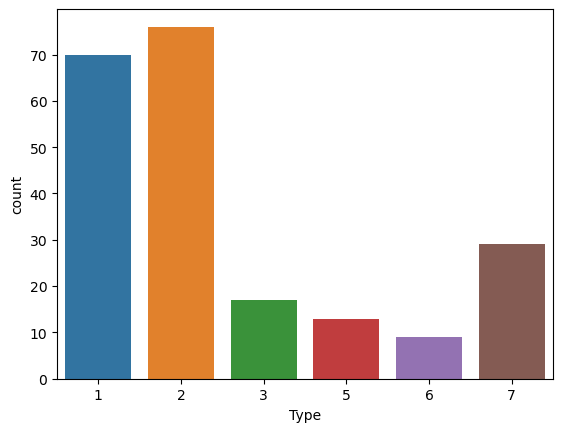

In [37]:
sns.countplot(data=glass , x='Type')
plt.show()

We could see that the type 2 and 1 counts are high and there is huge difference between the next highest count wich is 28 for type 3. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

In [38]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Describe function shows only numerical columns information,Lets check outliers with the help of boxplot. The features are not on the same scale. For example Fe has a mean of 0.057 while Si has a mean value of 72. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

# checking outliers with boxplot

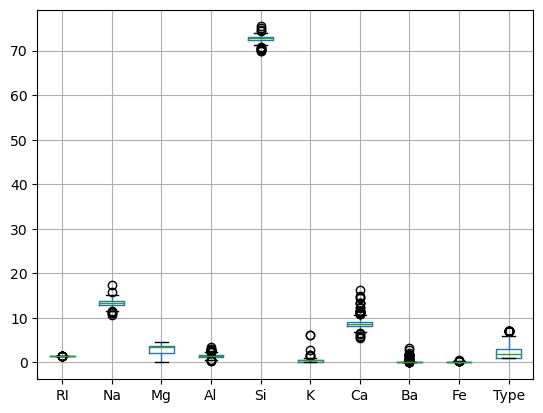

In [39]:
glass.boxplot()
plt.show();

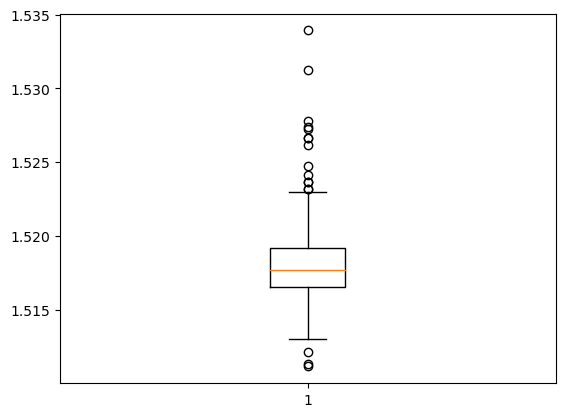

In [40]:
box=plt.boxplot(glass['RI'])
plt.show()

Majority points of RI column is inbetween 1.517 to 1.519 Refractive Index with mean value of 1.518 RI and having outliers on both sides of boxplot

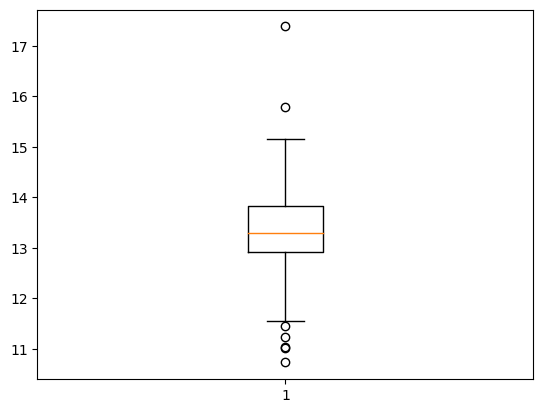

In [41]:
box1=plt.boxplot(glass['Na'])
plt.show()

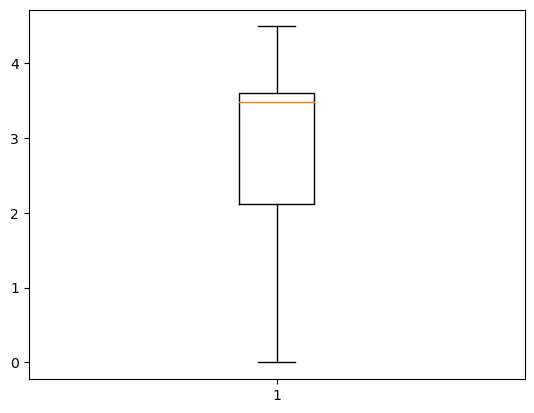

In [42]:
box3=plt.boxplot(glass['Mg'])
plt.show()

data has only one outlier which it is not that extreme so we keep it

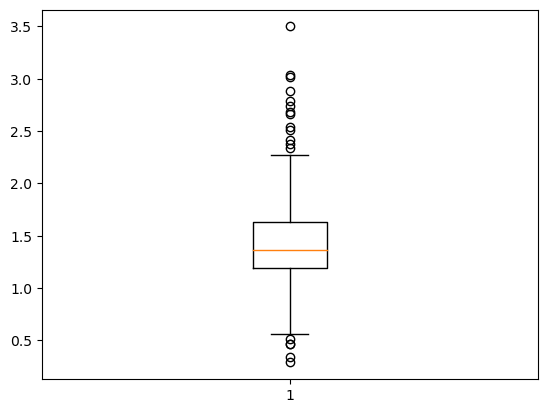

In [43]:
box4=plt.boxplot(glass['Al'])
plt.show()

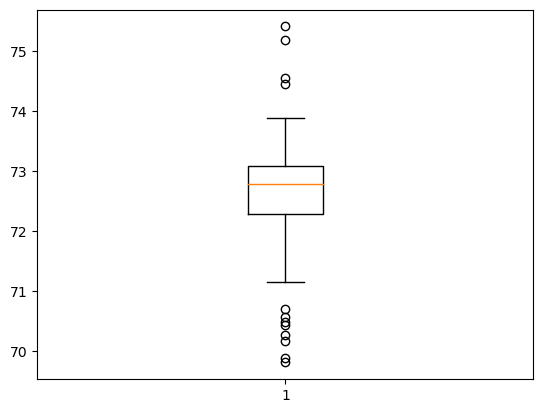

In [44]:
box5=plt.boxplot(glass['Si'])
plt.show()

data has outliers but not that extreme point form mean ,so we keep it

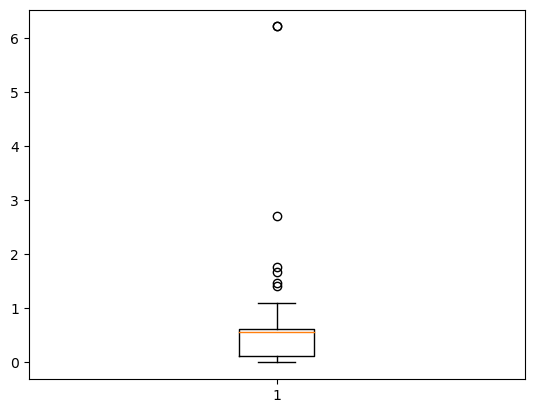

In [45]:
box6=plt.boxplot(glass['K'])
plt.show()

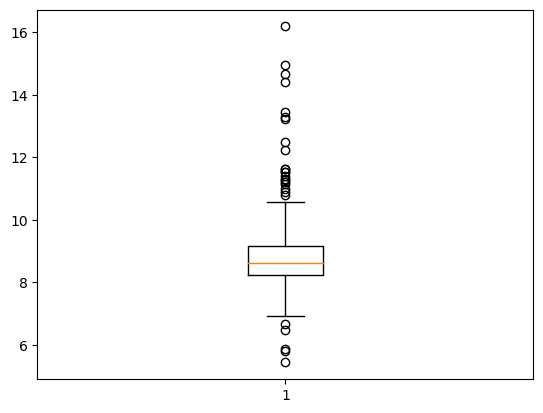

In [46]:
box7=plt.boxplot(glass['Ca'])
plt.show()

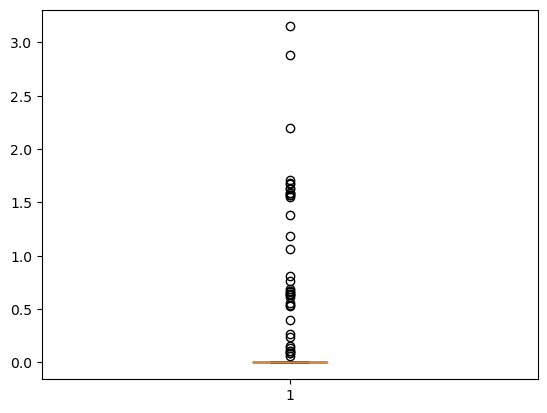

In [47]:
box8=plt.boxplot(glass['Ba'])
plt.show()

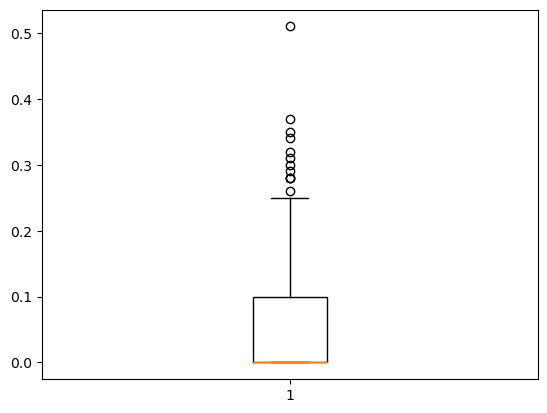

In [48]:
box9=plt.boxplot(glass['Fe'])
plt.show()

# data transformation

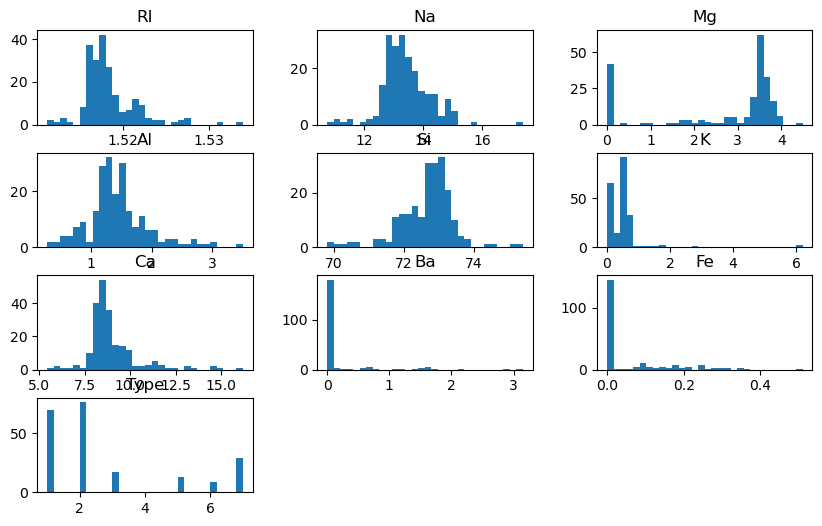

In [49]:
glass.hist(grid=False,
       figsize=(10, 6),
       bins=30)
plt.show();

All columns has skewness that are not normally distributed ,so we have to treat them,but before treating we have to check their correlations with target column

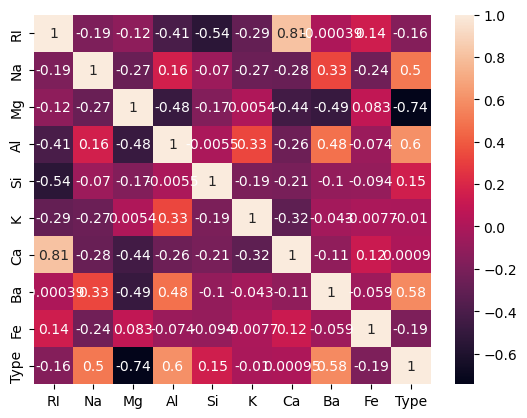

In [50]:
# We can also see if there are any trends or correlations in the data using a heatmap.
sns.heatmap(glass.corr(),annot=True)
plt.show();

This gives us a much clearer idea of what features play a more or less important role in identifying certain glass type. By heatmap it shows that correlation between Na,Mg,Al,Ba are very good,so if we treat their skewness their correlation value gets change.so we only transform those column who has minimum correlation between target.

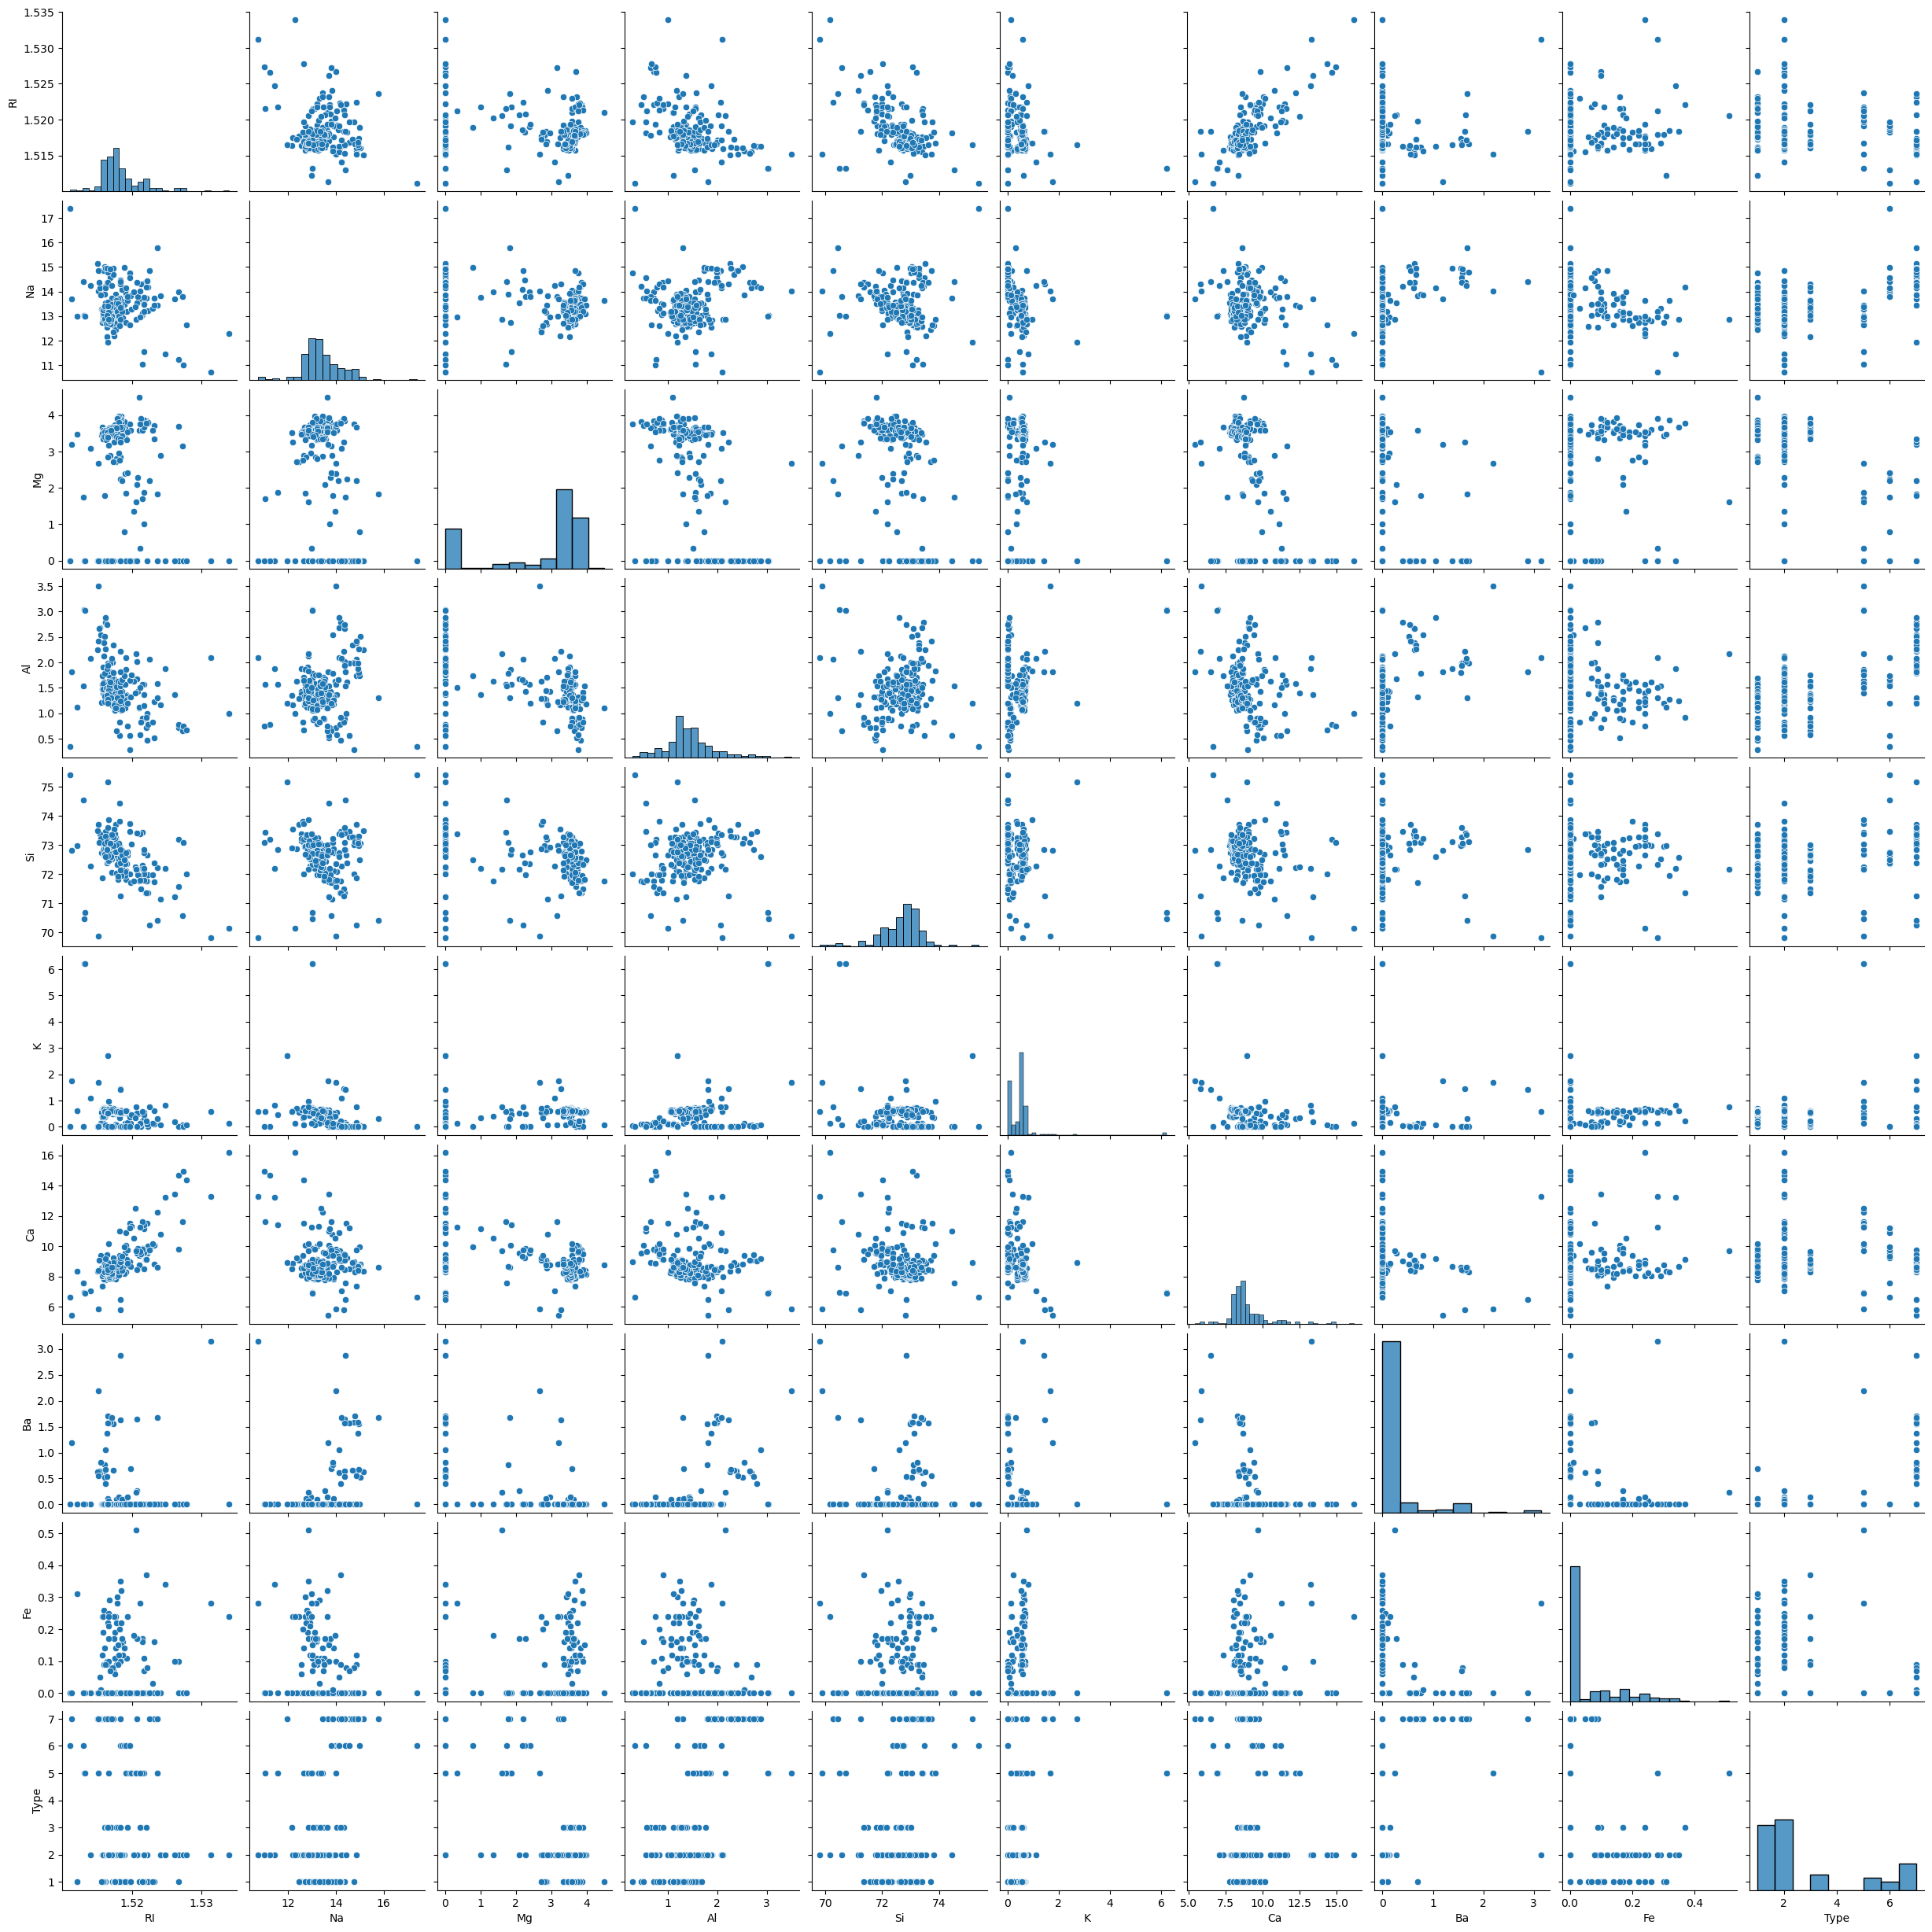

In [51]:
# lets check correlation by Visualization
sns.pairplot(glass)
plt.show();

# 3 - KNN

In [52]:
X = glass.iloc[:,0:9]
Y = glass.iloc[:,9]

In [53]:
num_folds = 10
kfold = KFold(n_splits=10)

In [54]:
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, X, Y, cv=kfold)
results

array([0.5       , 0.81818182, 0.63636364, 0.81818182, 0.28571429,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [55]:
print(results.mean())

0.42012987012987013


# Grid Search for Algorithm Tuning

### Grid Search for Algorithm Tuning

In [56]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [57]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [58]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


#### Machine Accuracy: 64%

# Visualizing the CV results

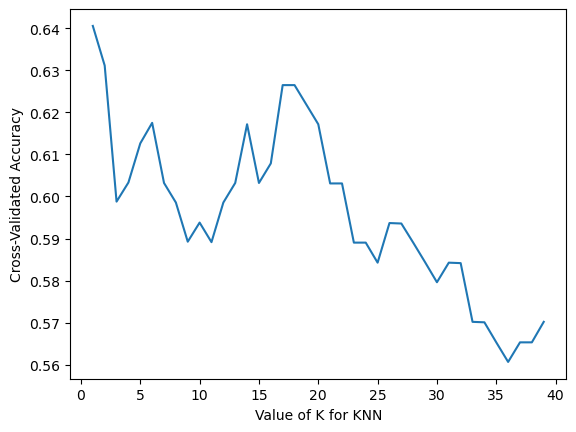

In [59]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Conclusion:the highest classification accuracy for glasses, when we consider 1 neighbours in the KNN algorithm